In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('customer_reviews_sentiment.csv')
print(data.head())
print(data.info())

  Review_ID Product_Category Customer_Age  \
0     R0001            Books          60+   
1     R0002             Toys          60+   
2     R0003             Toys        26-40   
3     R0004  Home Appliances        18-25   
4     R0005            Books        18-25   

                                  Review_Text Sentiment  
0                   Loved it! Will buy again.  Positive  
1                                 Five stars!  Positive  
2             Superb quality and great value.  Positive  
3         Horrible experience with this item.  Negative  
4  Average quality, acceptable for the price.   Neutral  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_ID         1000 non-null   object
 1   Product_Category  1000 non-null   object
 2   Customer_Age      1000 non-null   object
 3   Review_Text       1000 non-null   object


In [2]:
data.describe().T

,count,unique,top,freq
Review_ID,1000,1000,R0001,1
Product_Category,1000,5,Apparel,217
Customer_Age,1000,4,60+,266
Review_Text,1000,18,Neutral feelings about this.,80
Sentiment,1000,3,Positive,336


In [3]:
data.isnull().sum()

,0
Review_ID,0
Product_Category,0
Customer_Age,0
Review_Text,0
Sentiment,0


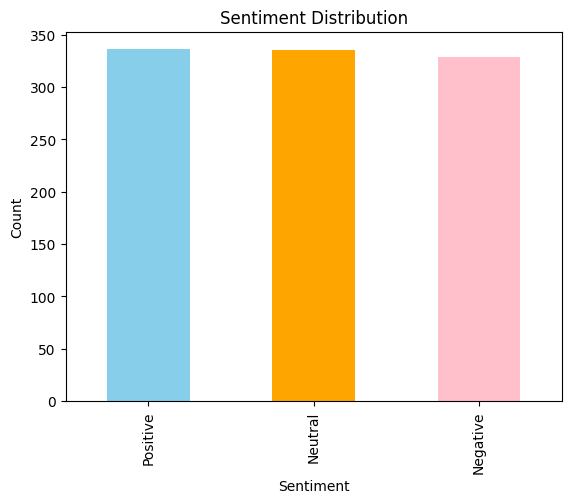

In [5]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
data['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'orange','pink'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['Review_Text']).toarray()
y = data['Sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[67  0  0]
 [ 0 61  0]
 [ 0  0 72]]


we can see that there are no miss classifications happened.

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        67
     Neutral       1.00      1.00      1.00        61
    Positive       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



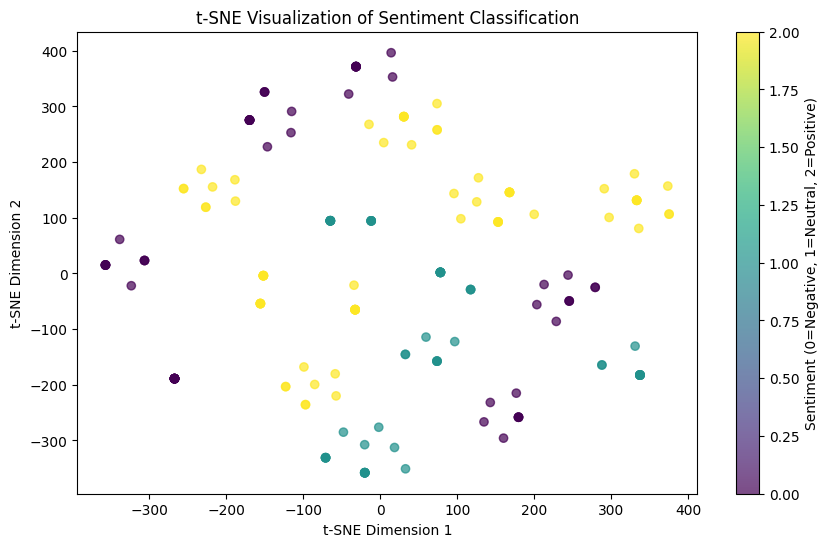

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Map sentiment labels to numeric values
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_test_numeric = y_test.map(label_mapping)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_test)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test_numeric, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Sentiment (0=Negative, 1=Neutral, 2=Positive)')
plt.title('t-SNE Visualization of Sentiment Classification')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

